# 给定预训练权重的Neural Network（神经网络）的数字识别

* 选用kernel learning_dl
~~~
conda activate learning_dl 

# conda remove --name learning_dl --all
~~~

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report#这个包是评价报告
# import tensorflow as tf

print("finish import module!!!")

finish import module!!!


In [2]:
def load_data(path, transpose=True):
    data = sio.loadmat(path)
    y = data.get('y')  # (5000,1)
    y = y.reshape(y.shape[0])  # make it back to column vector

    X = data.get('X')  # (5000,400)

    if transpose:
        # for this dataset, you need a transpose to get the orientation right
        X = np.array([im.reshape((20, 20)).T for im in X])

        # and I flat the image again to preserve the vector presentation
        X = np.array([im.reshape(400) for im in X])

    return X, y

# add intercept=1 for x0
X, y = load_data('ex3data1.mat',transpose=False)

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # intercept

# 神经网络模型
<div align="center">
  <img src="./nn_model.png" />
</div>


In [3]:
# 读入权重数据
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

theta1, theta2 = load_weight('ex3weights.mat')
print("theta1:",theta1.shape,"theta2:",theta2.shape)
X.shape, y.shape

theta1: (25, 401) theta2: (10, 26)


((5000, 401), (5000,))

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# feed forward prediction（前馈预测）

# 第一层
a1 = X
z2 = a1 @ theta1.T # (5000, 401) @ (25,401).T = (5000, 25)
z2 = np.insert(z2, 0, values=np.ones(z2.shape[0]), axis=1)#插入第一列
a2 = sigmoid(z2) #第一层的输出

# 第二层
z3 = a2 @ theta2.T
a3 = sigmoid(z3)

# 预测结果
y_pred = np.argmax(a3, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention，返回沿轴axis最大值的索引，axis=1代表行
print(classification_report(y, y_pred))#这个函数是评价报告，可以看到准确率，召回率，f1-score等

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



可视化隐藏层theta1： (25, 401)


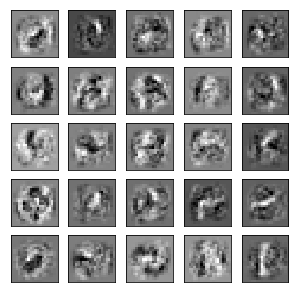

In [10]:
#将隐含层画出来

def plot_hidden_layer(theta):
    """
    theta: (10285, )
    """
    final_theta1= theta
    hidden_layer = final_theta1[:, 1:]  # ger rid of bias term theta

    fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(5, 5))

    for r in range(5):
        for c in range(5):
            ax_array[r, c].matshow(hidden_layer[5 * r + c].reshape((20, 20)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))


# nn functions starts here ---------------------------
# ps. all the y here is expanded version (5000,10)
print("可视化隐藏层theta1：",theta1.shape)
plot_hidden_layer(theta1)
plt.show()

可视化隐藏层theta2： (10, 26)


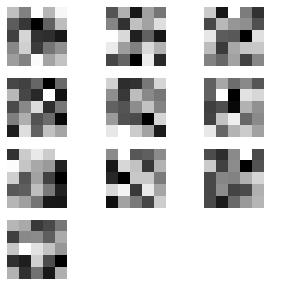

In [24]:

def plot_hidden_layer2(theta):
    """
    Visualize weights for theta with shape (10, 26).
    theta: (10, 26)
    """
    # Remove the bias term (first column), leaving (10, 25)
    hidden_layer = theta[:, 1:]

    # Assuming we want to visualize each hidden unit as a 5x5 grid
    num_units = hidden_layer.shape[0]  # Number of hidden units
    num_features = hidden_layer.shape[1]  # Number of features per unit

    # Reshape each hidden unit's weights into a 5x5 grid
    grid_size = int(np.sqrt(num_features))  # Assuming the weights can be reshaped into a square grid (5x5)

    # Calculate number of rows and columns for visualization
    grid_rows = int(np.ceil(np.sqrt(num_units)))  # Rows for visualization grid
    grid_cols = int(np.ceil(num_units / grid_rows))  # Columns for visualization grid

    # Initialize figure
    fig, ax_array = plt.subplots(nrows=grid_rows, ncols=grid_cols, sharey=True, sharex=True, figsize=(5, 5))

    # Make ax_array iterable for both 1D or 2D layouts
    if grid_rows * grid_cols > 1:
        ax_array = ax_array.flatten()

    for i, ax in enumerate(ax_array):
        if i < num_units:  # Only plot up to the number of units
            # Reshape to visualize weights for each hidden unit
            reshaped_weights = hidden_layer[i].reshape((grid_size, grid_size))  # Reshape to 5x5 (or whatever grid size)
            ax.matshow(reshaped_weights, cmap=matplotlib.cm.binary)
        ax.axis('off')  # Turn off axes for all plots

    # plt.show()

print("可视化隐藏层theta2：",theta2.shape)
plot_hidden_layer2(theta2)
plt.show()